In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(50)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
# first pass... this is a total guess
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 
                        'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 
                        'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']]

X = selected_features

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
y = df["koi_disposition"]
target_names = ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']
print(X.shape, y.shape)

(6991, 20) (6991,)


In [6]:
y.unique

<bound method Series.unique of 0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object>

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,139.064020,1.0170,1.8720,102.9,3.89,899,154.84,11.7,2,6047,4.387,1.092,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,140.207320,0.7090,3.3900,593.3,2.10,491,13.70,18.0,1,4852,4.519,0.804,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,131.792007,0.2620,1.5795,47337.0,14.59,1276,623.51,476.0,1,4664,4.594,0.683,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,187.569860,0.0010,10.3280,584.8,2.28,300,1.92,34.7,1,5646,4.447,0.954,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,175.715600,0.2136,10.2940,193.6,2.27,568,24.57,8.7,2,6705,4.145,1.608,294.93198,39.812420,12.964


In [10]:
# Scale your data

In [11]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [13]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
# Compile and fit the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 12,503
Trainable params: 12,503
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
5243/5243 - 1s - loss: 0.5514 - acc: 0.7120
Epoch 2/60
5243/5243 - 1s - loss: 0.3951 - acc: 0.7795
Epoch 3/60
5243/5243 - 0s - loss: 0.3817 - acc: 0.7925
Epoch 4/60
5243/5243 - 0s - loss: 0.3758 - acc: 0.7936
Epoch 5/60
5243/5243 - 0s - loss: 0.3745 - acc: 0.7986
Epoch 6/60
5243/5243 - 0s - loss: 0.3685 - acc: 0.8076
Epoch 7/60
5243/5243 - 0s - loss: 0.3671 - acc: 0.8104
Epoch 8/60
5243/5243 - 0s - loss: 0.3666 - acc: 0.8041
Epoch 9/60
5243/5243 - 1s - loss: 0.3625 - acc: 0.8102
Epoch 10/60
5243/5243 - 0s - loss: 0.3624 - acc: 0.8076
Epoch 11/60
5243/5243 - 0s - loss: 0.3597 - acc: 0.8144
Epoch 12/60
5243/5243 - 0s - loss: 0.3586 - acc: 0.8108
Epoch 13/60
5243/5243 - 0s - loss: 0.3552 - acc: 0.8140
Epoch 14/60
5243/5243 - 0s - loss: 0.3566 - acc: 0.8117
Epoch 15/60
5243/5243 - 0s - loss: 0.3540 - acc: 0.8148
Epoch 16/60
5243/5243 - 0s - loss: 0.3510 - acc: 0.8138
Epoch 17/60
5243/5243 - 0s - loss: 0.3497 - acc: 0.8232
Epoch 18/60
5243/5243 - 0s - loss: 0.3491 - acc: 0.8190
E

In [22]:
# Quantify Trained Model

In [23]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)

print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1748 - 0s - loss: 0.3152 - acc: 0.8593
Normal Neural Network - Loss: 0.3152368154623961, Accuracy: 0.8592677116394043


In [24]:
# Make Predictions

In [25]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [26]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE']
Actual Labels: ['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE']


In [27]:
# print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

# These print statements do not work here:
# AttributeError: 'Sequential' object has no attribute 'score'

AttributeError: 'Sequential' object has no attribute 'score'

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [29]:
# Create the GridSearchCV model

# Support Vector Machine linear classifier  (from Session21.2  2.10 Stu GridSearch class exercise)

from sklearn.svm import SVC
grid_search_model = SVC(kernel='linear')

In [32]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
# from 21.2 10-Stu GridSearch class exercise ... 
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
             'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(grid_search_model, param_grid, verbose=3)

In [33]:
# Train the model with GridSearch
# Fit the model using the grid search estimator
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.757, total=90.0min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 90.0min remaining:    0.0s


[CV] .................. C=1, gamma=0.0001, score=0.781, total=136.6min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 226.6min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.778, total=58.8min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.779, total=41.2min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.788, total=84.5min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.757, total=76.5min
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=0.781, total=118.0min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.778, total=58.9min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.779, total=41.2min
[CV] C=1, gamma=0.001 ................................................
[CV] .

KeyboardInterrupt: 

In [34]:
print(grid.best_params_)
print(grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

This is the output from the killed run that spurred the conversation below:
    
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ................... C=1, gamma=0.0001, score=0.757, total=90.0min
[CV] C=1, gamma=0.0001 ...............................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 90.0min remaining:    0.0s
[CV] .................. C=1, gamma=0.0001, score=0.781, total=136.6min
[CV] C=1, gamma=0.0001 ...............................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 226.6min remaining:    0.0s
[CV] ................... C=1, gamma=0.0001, score=0.778, total=58.8min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.779, total=41.2min
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.788, total=84.5min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.757, total=76.5min
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=0.781, total=118.0min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.778, total=58.9min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.779, total=41.2min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.788, total=86.5min
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.757, total=78.6min
[CV] C=1, gamma=0.01 .................................................    

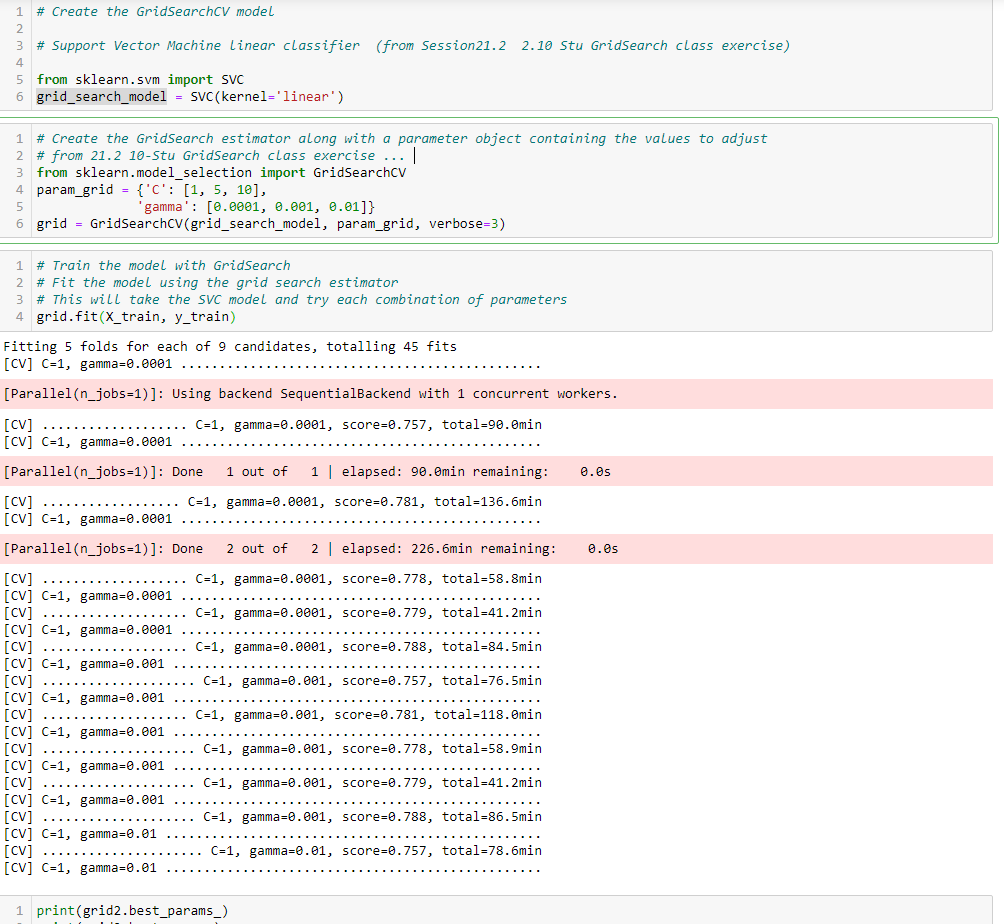

And these were the initial parameters:

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
             'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(grid_search_model, param_grid, verbose=3)

Dominic LaBella, Instructor  22 minutes ago
Hi. At the rate this is going (quick approximation, using averages), this will take 59.37 hours to run, which means you have another 44.8 hours to wait. I say kill it and skip the notion of a GridSearch. I'll say more in a DM.

Dominic LaBella, Instructor  12:10 PM
If you really want to go crazy with this, you could try loading your Jupyter notebook into a Colab session and running it there. And then you could bump the machine instance from the basic, free tier up to the largest machine that's available to you. This should make it run much faster.

12:13
A math background is good, but GridSearch really isn't about math. It's really just a series of nested for-loops. The parameters over which you're searching will vary from model to model to model; e.g., an SVM will have totally different parameters from a logistic regression. And, again, these are the various parameters that help you tune the search for the solution.
(Also, just in case you're curious: machine learning really requires knowledge of linear algebra and constrained optimization. Stuff you won't find in a typical calculus class.)

Dominic LaBella, Instructor  25 minutes ago
@Sharon Templin TTh I'm looking at the documentation[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html]  now. On your machine, which has four cores, you could specify n_jobs = 3 as a parameter to GridSearchCV(). I wouldn't set it to four because you want to leave one core to supervise the others (and do Windows garbage collection). This would speed things up, but not necessarily enough to matter. You'd have to try it and see. (Disclaimer: I'm not sure exactly which version of skikit-learn you have, so the documentation may have changed a bit.) If you try this, please report back with what you find.

Dominic LaBella, Instructor  24 minutes ago
What n_jobs = 3 will do is run three different fit -> evaluate cycles at a time, in parallel, with each job running on its own CPU core. Theoretically, this will reduce the total job time from 59 hours to 20. :zany_face:

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)